# Exploring `gym-anytrading`

### Imports and Setup

In [1]:
# Gym stuff
import gym
import gym_anytrading

# Processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
env = gym.make('stocks-v0', frame_bound=(10,2000), window_size=10)

### What are the attributes of the environmnet?

In [3]:
env.df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100
...,...,...,...,...,...,...
2018-08-23,1219.880005,1235.170044,1219.349976,1221.160034,1221.160034,1233300
2018-08-24,1226.000000,1237.400024,1221.420044,1236.750000,1236.750000,1222700
2018-08-27,1244.140015,1257.869995,1240.680054,1256.270020,1256.270020,1429000


In [4]:
type(env.df)

pandas.core.frame.DataFrame

In [5]:
env.prices # close prices from the dataframe up to row 2000

array([196.946945, 202.382385, 202.982986, ..., 924.52002 , 932.820007,
       937.090027])

In [6]:
all(env.df['Close'][0:2000].to_numpy() == env.prices)

True

In [7]:
env.signal_features # prices and np.diff(prices)

array([[1.96946945e+02, 0.00000000e+00],
       [2.02382385e+02, 5.43544000e+00],
       [2.02982986e+02, 6.00601000e-01],
       ...,
       [9.24520020e+02, 3.30800180e+01],
       [9.32820007e+02, 8.29998700e+00],
       [9.37090027e+02, 4.27002000e+00]])

In [8]:
all(env.signal_features[:,0] == env.prices), all(env.signal_features[:,1][1:] == np.diff(env.prices))

(True, True)

In [9]:
print("env information:")
print("> shape:", env.shape)
print("> df.shape:", env.df.shape)
print("> prices.shape:", env.prices.shape)
print("> signal_features.shape:", env.signal_features.shape)
print("> max_possible_profit:", env.max_possible_profit())

env information:
> shape: (10, 2)
> df.shape: (2335, 6)
> prices.shape: (2000,)
> signal_features.shape: (2000, 2)
> max_possible_profit: 57802.409746568985


### What does the environment look like?

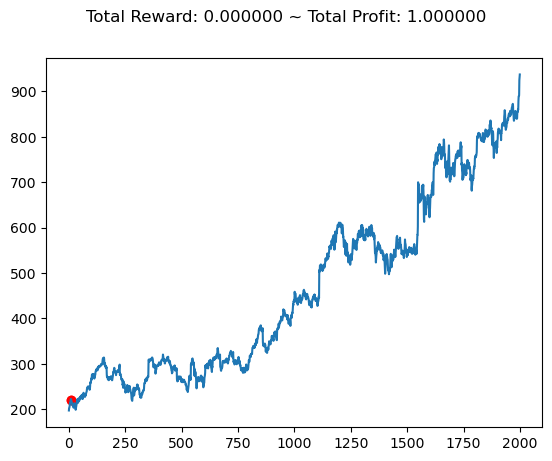

In [10]:
env.reset()
env.render()

In [11]:
env.action_space # sell (0) or buy (1)

Discrete(2)

### What are the observations?

In [12]:
observation = env.reset()

In [13]:
observation # this is the previous 10 rows of signal_features

array([[202.382385,   5.43544 ],
       [202.982986,   0.600601],
       [205.405411,   2.422425],
       [208.823822,   3.418411],
       [213.4935  ,   4.669678],
       [214.414413,   0.920913],
       [216.041046,   1.626633],
       [220.360367,   4.319321],
       [222.382385,   2.022018],
       [219.604599,  -2.777786]])

In [14]:
all((observation == env.signal_features[1:11]).flatten())

True

### Example with a random policy

info: {'total_reward': 270.2300449999997, 'total_profit': 0.36294066727002045, 'position': 0}


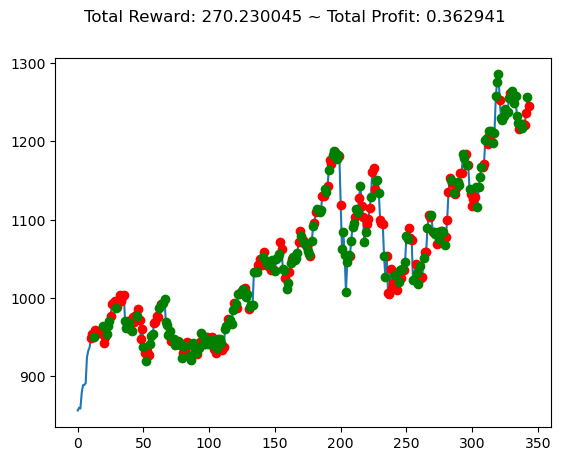

In [16]:
env_prediction = gym.make('stocks-v0', frame_bound=(2000,-1), window_size=10) # make a new environment with unseen data

observation = env_prediction.reset()
while True: 
    action = env_prediction.action_space.sample()
    observation, reward, done, info = env_prediction.step(action)
    if done:
        print('info:', info)
        env_prediction.render_all()
        break